Explained Variance Ratio: [0.21302684 0.2023211 ]
Total Explained Variance: 0.4153479344261587


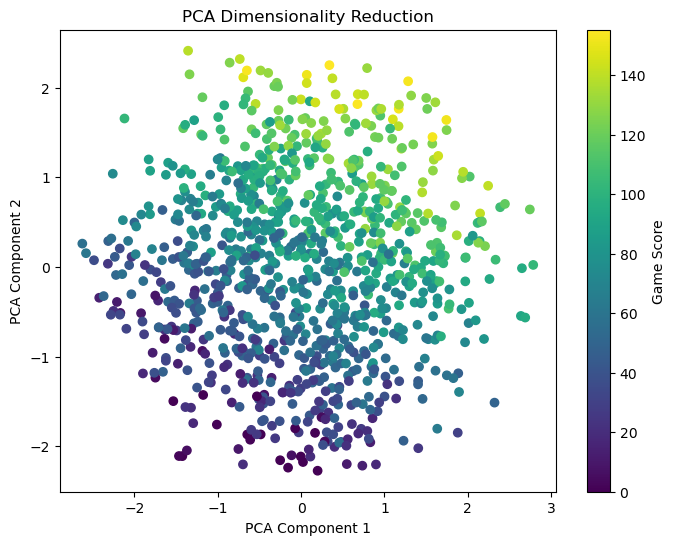

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate data (same as in the original code)
num_samples = 1000

player_experience = np.random.randint(1, 11, num_samples)
average_reaction_time = np.random.uniform(0.2, 1.5, num_samples)
game_duration = np.random.uniform(20, 120, num_samples)
strategy_complexity = np.random.randint(1, 6, num_samples)
opponent_difficulty = np.random.uniform(1, 10, num_samples)

noise = np.random.normal(0, 5, num_samples)
game_score = (
    10 * player_experience -
    5 * average_reaction_time +
    0.3 * game_duration +
    8 * strategy_complexity -
    4 * opponent_difficulty +
    noise
)

game_score = np.maximum(game_score, 0)

data = pd.DataFrame({
    "Player Experience": player_experience,
    "Average Reaction Time": average_reaction_time,
    "Game Duration (mins)": game_duration,
    "Strategy Complexity": strategy_complexity,
    "Opponent Difficulty": opponent_difficulty,
    "Game Score": game_score
})

# Prepare features for dimensionality reduction
features = data[["Player Experience", "Average Reaction Time", "Game Duration (mins)", "Strategy Complexity", "Opponent Difficulty"]]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(features_scaled)

# Create a new DataFrame with the reduced dimensions
pca_df = pd.DataFrame(data=principal_components, columns=["PCA Component 1", "PCA Component 2"])
pca_df["Game Score"] = data["Game Score"]

# Display the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Explained Variance: {sum(explained_variance)}")

# Plot the reduced dimensions
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df["PCA Component 1"], pca_df["PCA Component 2"], c=data["Game Score"], cmap="viridis")
plt.colorbar(scatter, label="Game Score")
plt.title("PCA Dimensionality Reduction")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
